In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib notebook
%run ../quaternion.py

In [23]:
def vector_normalize(v):
    return v / np.linalg.norm(v)

def plot_vector(axes, *, position, direction, length=1., linewidth=1.0, linestyle='solid', color='r', alpha=1.):
    axes.quiver(position[0], position[1], position[2], direction[0], direction[1], direction[2], length=length, linewidth=linewidth, linestyle=linestyle, color=color, alpha=alpha)

def plot_basis(axes, *, length=1., linewidth=1.):
    org = np.zeros(3)
    plot_vector(axes, position=org, direction=np.array([1., 0., 0.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')
    plot_vector(axes, position=org, direction=np.array([0., 1., 0.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')
    plot_vector(axes, position=org, direction=np.array([0., 0., 1.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')

def plot_sphere(axes, *, radius=1., color='r', alpha=1.):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    axes.plot_surface(x, y, z,  rstride=4, cstride=4, color=color, alpha=alpha)

Draw a squad path.

<IPython.core.display.Javascript object>


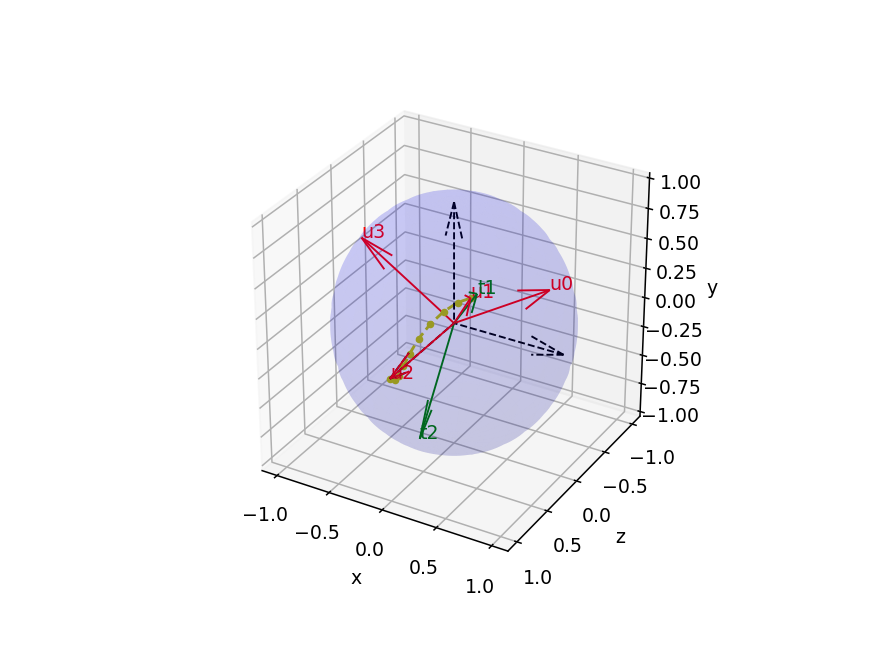

In [24]:
def plot1():
    q0 = Quaternion.from_axis_angle(vector_normalize(np.array([0., 0., 1.])), math.radians(30.))
    q1 = Quaternion.from_axis_angle(vector_normalize(np.array([0., 1.,-1.])), math.radians(-60.))
    q2 = Quaternion.from_axis_angle(vector_normalize(np.array([-1., 1.,-1.])), math.radians(-120.))
    q3 = Quaternion.from_axis_angle(vector_normalize(np.array([0., 0., 1.])), math.radians(150.))
    tq1 = Quaternion.squad_tangent(q0, q1, q2)
    tq2 = Quaternion.squad_tangent(q1, q2, q3)
    v  = np.array([1., 0., 0.])

    squad_path = []
    for t in np.linspace(0., 1., 10):
        q = Quaternion.squad(q1, q2, tq1, tq2, t)
        squad_path.append(Quaternion.rotate(q, v))

    u0 = Quaternion.rotate(q0, v)
    u1 = squad_path[0]
    u2 = squad_path[-1]
    u3 = Quaternion.rotate(q3, v)
    t1 = Quaternion.rotate(tq1, v)
    t2 = Quaternion.rotate(tq2, v)
        
    squad_path = np.array(squad_path).transpose()
    #
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1, projection='3d')

    plot_sphere(axes, color='b', alpha=0.1)
    plot_basis(axes)
    axes.plot(squad_path[0], squad_path[2], squad_path[1], linestyle='dashed', marker='o', markersize=3, color='y')
    plot_vector(axes, position=np.zeros(3), direction=np.take(u0, (0, 2, 1)), color='r')
    axes.text(u0[0], u0[2], u0[1], 'u0', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(u1, (0, 2, 1)), color='r')
    axes.text(u1[0], u1[2], u1[1], 'u1', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(u2, (0, 2, 1)), color='r')
    axes.text(u2[0], u2[2], u2[1], 'u2', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(u3, (0, 2, 1)), color='r')
    axes.text(u3[0], u3[2], u3[1], 'u3', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(t1, (0, 2, 1)), color='g')
    axes.text(t1[0], t1[2], t1[1], 't1', color='g')
    plot_vector(axes, position=np.zeros(3), direction=np.take(t2, (0, 2, 1)), color='g')
    axes.text(t2[0], t2[2], t2[1], 't2', color='g')
    
    axes.set_aspect('equal', adjustable='box')
    axes.set_xlabel('x')
    axes.set_ylabel('z')
    axes.set_zlabel('y')
    axes.invert_yaxis()
    plt.show()
    
plot1()